In [44]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import math
from IPython.core.debugger import set_trace
    
    #data                    = orignial csv data
    #data_fixed_10m          = original csv 10m data with the average measument, with the average speed for each
    #data_fixed_5m           = original csv 5m data with the average measument, with the average speed for each
    #df_mru_10m              = contains only the data_fixed_10m for MRU movements
    #df_muv_10m              = contains only the data_fixed_10m for MUV movements 
    #pessoas                 = array with keys of data_fixed for each person
    #df_mru_ppl_10m          = dictionary with people and their respective 10m MRU data with average
    #df_muv_ppl_10m          = dictionary with people and their respective 10m MUV data with average
    #plt_data_mru_10m        = matrix with the 10m MRU averages of each person by distance
    #plt_data_muv_10m        = matrix with the 10m MUV averages of each person by distance
    #plt_data_mru_10m_ln     = matrix with the 10m lg of each element of plt_data_mru
    #plt_data_muv_10m_ln     = matrix with the 10m lg of each element of plt_data_muv
    #plt_ideal_mru_10m       = matrix with the 10m ideal MRU averages of each person by distance
    #plt_ideal_muv_10m       = matrix with the 10m ideal MUV averages of each person by distance
    #plt_ideal_mru_10m_ln    = matrix with the 10m lg of each element of plt_ideal_mru
    #plt_ideal_muv_10m_ln    = matrix with the 10m lg of each element of plt_ideal_muv
    #plt_data_mru_10m_euler  = matrix with MRU euler 10m positions for plotting
    #plt_data_muv_10m_euler  = matrix with MUV euler 10m positions for plotting
    #plt_data_mru_10m_ana    = matrix with MRU analytical 10m positions for plotting
    #plt_data_muv_10m_ana    = matrix with MUV analytical 10m positions for plotting

In [45]:
#
#Auxiliary functions
#
def separador():
    print("----------------------------------------------------------------------------------------------------")

def nextXeuler(x,t,params,dt):
    """ 
    nextXeuler implementa o método de Euler. 
        
    Parâmetros:
    -----------
    x: float - Posição atual
    t: float - Tempo atual
    params: float - vetor de três posições com as constantes a, b e a posição inicial
    dt: float - passo de tempo
    
    Returns:
    --------
    x: float : posição atualizada
    
    """
    ### BEGIN SOLUTION
    return x + dt*(2*params[0]*t + params[1])
    ### END SOLUTION

def nextXana(t,params):
    """ 
    nextXana implementa o método analítico. 

    Parâmetros:
    -----------
    t: float - Tempo atual
    params: float - vetor de três posições com as constantes a, b e a posição inicial
    
    Returns:
    --------
    x: float : posição atualizada
    
    """
    ### BEGIN SOLUTION
    # S = S0 + V0*t + 0.5*a*t*t
    return params[0] + t*params[1] + t*t*params[0]
    ### END SOLUTION


In [46]:
#
#Le arquivo com tempos obtidos de experimentos
#
data = pd.read_csv("../DADOS/tempos.csv")

print(data)

     Pessoa Tipo_mov  Travessia  10m_1  10m_2  20m_1  20m_2  30m_1  30m_2  \
0   Matheus      MRU          1   7.10   7.64  14.47  14.99  21.53  22.01   
1   Matheus      MRU          2   7.53   6.27  14.11  13.11  21.30  20.28   
2   Matheus      MRU          3   7.30   7.21  15.18  14.33  21.49  21.48   
3      Kazu      MRU          1   8.35   8.07  15.78  15.33  22.76  22.57   
4      Kazu      MRU          2   8.51   7.91  15.28  14.78  22.31  21.79   
5      Kazu      MRU          3   8.31   8.38  16.21  16.45  23.44  23.74   
6   Gabriel      MRU          1   6.79   6.57  12.98  12.87  19.21  19.00   
7   Gabriel      MRU          2   6.85   6.97  13.22  12.87  19.44  19.52   
8   Gabriel      MRU          3   7.01   6.97  13.37  13.60  19.80  20.23   
9   Matheus      MUV          1   9.39   9.00  13.41  13.54  16.76  16.95   
10  Matheus      MUV          2   8.77   8.91  12.92  13.26  16.73  16.76   
11  Matheus      MUV          3   9.74  10.07  13.82  14.12  17.12  17.35   

In [47]:
#
#calculates the average of the two time measurements
#
data_fixed_10m = data.copy()
#selects the three first columns
data_fixed_10m = data_fixed_10m.loc[:, 'Pessoa' : 'Travessia']
#adds columns containing the time values
for i in range(1, 4):
    data_fixed_10m[str(i) + "0m"] = (data.iloc[:, (i * 2) + 1] + data.iloc[:, (i * 2) + 2]) / 2
#calcules the average speed
data_fixed_10m["Velocidade_media"] = (30.0 / data_fixed_10m["30m"])

data_fixed_5m = data.copy()
#selects the three first columns
data_fixed_5m = data_fixed_5m.loc[:, 'Pessoa' : 'Travessia']
#adds columns containing the 5m time values
data_fixed_5m = data_fixed_5m.join(data.loc[:, '5m' : '30m'])
#calcules the average speed
data_fixed_5m["Velocidade_media"] = (30.0 / data_fixed_5m["30m"])

print(data_fixed_10m)
#print(data_fixed_5m)

     Pessoa Tipo_mov  Travessia    10m     20m     30m  Velocidade_media
0   Matheus      MRU          1  7.370  14.730  21.770          1.378043
1   Matheus      MRU          2  6.900  13.610  20.790          1.443001
2   Matheus      MRU          3  7.255  14.755  21.485          1.396323
3      Kazu      MRU          1  8.210  15.555  22.665          1.323627
4      Kazu      MRU          2  8.210  15.030  22.050          1.360544
5      Kazu      MRU          3  8.345  16.330  23.590          1.271725
6   Gabriel      MRU          1  6.680  12.925  19.105          1.570270
7   Gabriel      MRU          2  6.910  13.045  19.480          1.540041
8   Gabriel      MRU          3  6.990  13.485  20.015          1.498876
9   Matheus      MUV          1  9.195  13.475  16.855          1.779887
10  Matheus      MUV          2  8.840  13.090  16.745          1.791580
11  Matheus      MUV          3  9.905  13.970  17.235          1.740644
12     Kazu      MUV          1  6.540  10.400  13.

In [48]:
#saves data separetely
df_mru_10m = data_fixed_10m[0:9]
df_muv_10m = data_fixed_10m[9:18]

df_mru_5m = data_fixed_5m[0:9]
df_muv_5m = data_fixed_5m[9:18]

#print(df_mru_10m)
#print(df_muv_10m)
#print(df_mru_5m)
#print(df_muv_5m)

In [49]:
#
#Separates data by people
#
#creates dictionary
pessoas = data_fixed_10m["Pessoa"].unique()
df_mru_ppl_10m = {}
df_muv_ppl_10m = {}
df_mru_ppl_5m = {}
df_muv_ppl_5m = {}
for p in pessoas:
    #Average for 10m
    #adds average for MRU
    aux = df_mru_10m[df_mru_10m.Pessoa == p]
    valSum10 = aux["10m"].sum()/3
    valSum20 = aux["20m"].sum()/3
    valSum30 = aux["30m"].sum()/3
    df_mru_ppl_10m[p] = {'10m' : valSum10, '20m' : valSum20,
                  '30m' : valSum30, 'VM_0-10' : 10/valSum10, 'VM_10-20' : 10/(valSum20-valSum10),
                  'VM_20-30' : 10/(valSum30-valSum20), 'VM' : 30/valSum30}
    
#     #adds average to MUV
#     aux = df_muv_10m[df_muv_10m.Pessoa == p]
#     valSum10 = aux["10m"].sum()/3
#     valSum20 = aux["20m"].sum()/3
#     valSum30 = aux["30m"].sum()/3
#     df_muv_ppl_10m[p] = {'10m' : valSum10, '20m' : valSum20,
#                   '30m' : valSum30, 'VM_0-10' : 10/valSum10, 'VM_10-20' : 10/(valSum20-valSum10),
#                   'VM_20-30' : 10/(valSum30-valSum20), 'VM' : 30/valSum30}
    
    #Average for 5m
    #average for MRU
    aux = df_mru_5m[df_mru_5m.Pessoa == p]
    valSum5  = aux["5m"].sum()/3
    valSum10 = aux["10m"].sum()/3
    valSum15 = aux["15m"].sum()/3
    valSum20 = aux["20m"].sum()/3
    valSum25 = aux["25m"].sum()/3
    valSum30 = aux["30m"].sum()/3
    df_mru_ppl_5m[p] = {'5m' : valSum5, '10m' : valSum10, '15m' : valSum15, '20m' : valSum20, '25m' : valSum25,
                  '30m' : valSum30, 'VM_0-5' : 5/valSum5, 'VM_5-10' : 5/(valSum10-valSum5),
                  'VM_10-15' : 5/(valSum15-valSum10), 'VM_15-20' : 5/(valSum20-valSum15),
                  'VM_20-25' : 5/(valSum25-valSum20), 'VM_25-30' : 5/(valSum30-valSum25), 'VM' : 30/valSum30}
     
#     #average for MUV
#     aux = df_muv_5m[df_muv_5m.Pessoa == p]
#     valSum5  = aux["5m"].sum()/3
#     valSum10 = aux["10m"].sum()/3
#     valSum15 = aux["15m"].sum()/3
#     valSum20 = aux["20m"].sum()/3
#     valSum25 = aux["25m"].sum()/3
#     valSum30 = aux["30m"].sum()/3
#     df_muv_ppl_5m[p] = {'5m' : valSum5, '10m' : valSum10, '15m' : valSum15, '20m' : valSum20, '25m' : valSum25,
#                   '30m' : valSum30, 'VM_0-5' : 5/valSum5, 'VM_5-10' : 5/(valSum10-valSum5),
#                   'VM_10-15' : 5/(valSum15-valSum10), 'VM_15-20' : 5/(valSum20-valSum15),
#                   'VM_20-25' : 5/(valSum25-valSum20), 'VM_25-30' : 5/(valSum30-valSum25), 'VM' : 30/valSum30}

#print (df_mru_ppl_10m)
#print (df_muv_ppl_10m)
#print (df_mru_ppl_5m)
#print (df_muv_ppl_5m)

In [50]:
#params for euler/analytical
xRange = {}
params_mru = [0, 0, 0]
plt_mru_10m_euler = []
plt_mru_10m_euler_ln = []
plt_mru_10m_ideal_ln = []
plt_mru_5m_euler = []
plt_mru_5m_euler_ln = []
plt_mru_5m_ideal_ln = []
auxiliary = {0: "Matheus", 1:"Kazu", 2:"Gabriel"}

for i in range(len(pessoas)):
    #calculates the 10m  data
    plt_mru_10m_euler.append([0])
    plt_mru_10m_euler_ln.append([0])
    plt_mru_10m_ideal_ln.append([0])
    j = 0
    step = 0.03
    max = df_mru_ppl_10m[auxiliary[i]]["30m"]
    vm = df_mru_ppl_10m[auxiliary[i]]["VM"]
    xRange[i] = [0]
    index = 0
    while(j < max):
        xRange[i].append(j)
        aux = plt_mru_10m_euler[i][index]
        if (aux < 10):
            params_mru[1] = df_mru_ppl_10m[auxiliary[i]]['VM_0-10']
        elif (aux < 20):
            params_mru[1] = df_mru_ppl_10m[auxiliary[i]]['VM_10-20']
        else:
            params_mru[1] = df_mru_ppl_10m[auxiliary[i]]['VM_20-30']
        plt_mru_10m_euler[i].append(nextXeuler(aux, j, params_mru, step))
        plt_mru_10m_euler_ln[i].append(math.log(1 + plt_mru_10m_euler[i][index]))
        plt_mru_10m_ideal_ln[i].append(nextXeuler(plt_mru_10m_ideal_ln[i][index], j, [0,vm, 0], step))
        j += step
        index += 1
    for j in range(len(plt_mru_10m_ideal_ln[i])):
        plt_mru_10m_ideal_ln[i][j] = math.log(1 + plt_mru_10m_ideal_ln[i][j])
        
    #calculates the 5m data
    plt_mru_5m_euler.append([0])
    plt_mru_5m_euler_ln.append([0])
    plt_mru_5m_ideal_ln.append([0])
    j = 0
    step = 0.03
    max = df_mru_ppl_5m[auxiliary[i]]["30m"]
    vm = df_mru_ppl_5m[auxiliary[i]]["VM"]
    xRange[i + 3] = [0]
    index = 0
    while(j < max):
        xRange[i+ 3].append(j)
        aux = plt_mru_5m_euler[i][index]
        if (aux < 5):
            params_mru[1] = df_mru_ppl_5m[auxiliary[i]]['VM_0-5']
        elif (aux < 10):
            params_mru[1] = df_mru_ppl_5m[auxiliary[i]]['VM_5-10']
        elif (aux < 15):
            params_mru[1] = df_mru_ppl_5m[auxiliary[i]]['VM_10-15']
        elif (aux < 20):
            params_mru[1] = df_mru_ppl_5m[auxiliary[i]]['VM_15-20']
        elif (aux < 25):
            params_mru[1] = df_mru_ppl_5m[auxiliary[i]]['VM_20-25']
        else:
            params_mru[1] = df_mru_ppl_5m[auxiliary[i]]['VM_25-30']
            
        plt_mru_5m_euler[i].append(nextXeuler(aux, j, params_mru, step))
        plt_mru_5m_euler_ln[i].append(math.log(1 + plt_mru_5m_euler[i][index]))
        plt_mru_5m_ideal_ln[i].append(nextXeuler(plt_mru_5m_ideal_ln[i][index], j, [0,vm, 0], step))
        j += step
        index += 1
    for j in range(len(plt_mru_5m_ideal_ln[i])):
        plt_mru_5m_ideal_ln[i][j] = math.log(1 + plt_mru_5m_ideal_ln[i][j])
    
#print(plt_mru_10m_euler)
# plt_mru_10m_ana
# plt_muv_10m_ana
#print(plt_mru_10m_ideal_ln[0])


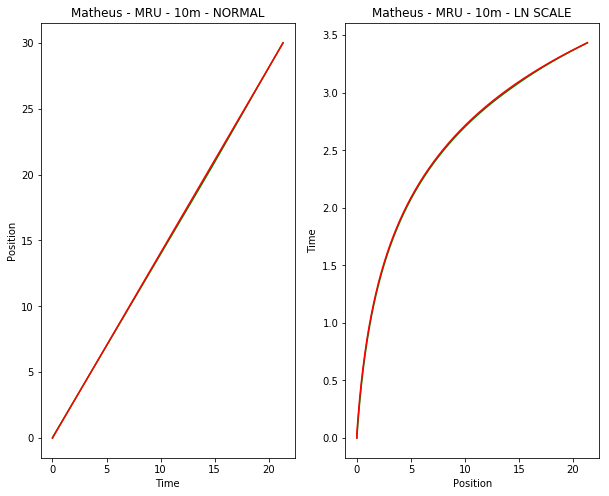

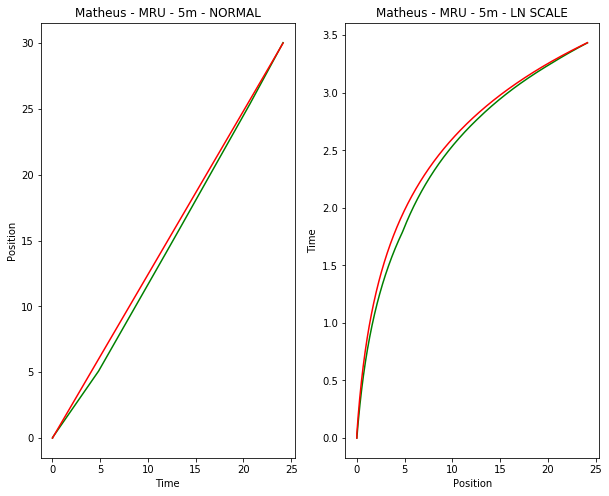

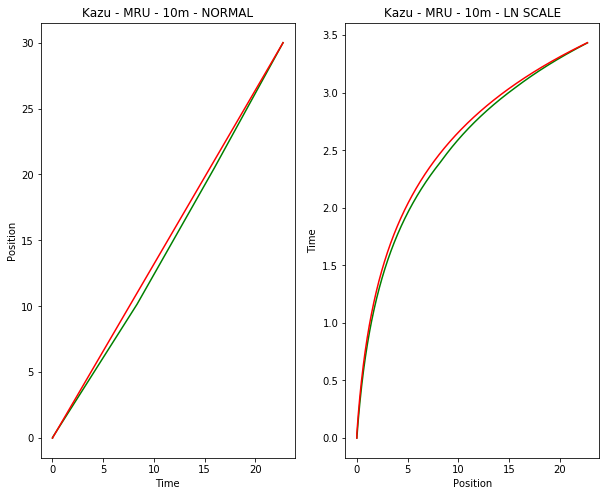

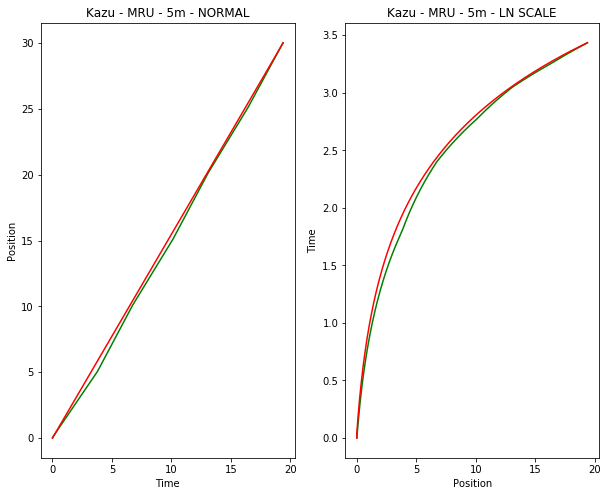

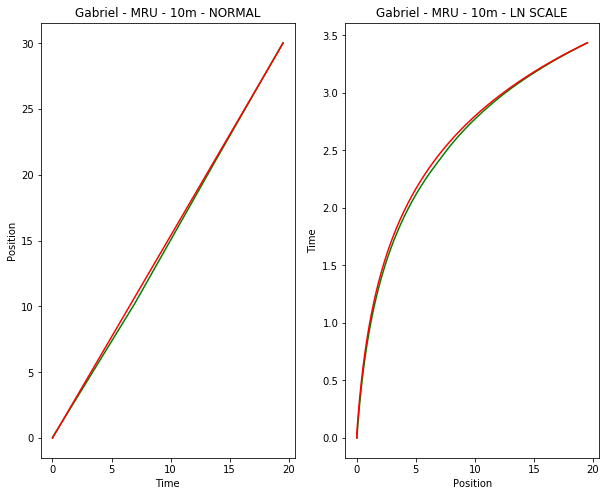

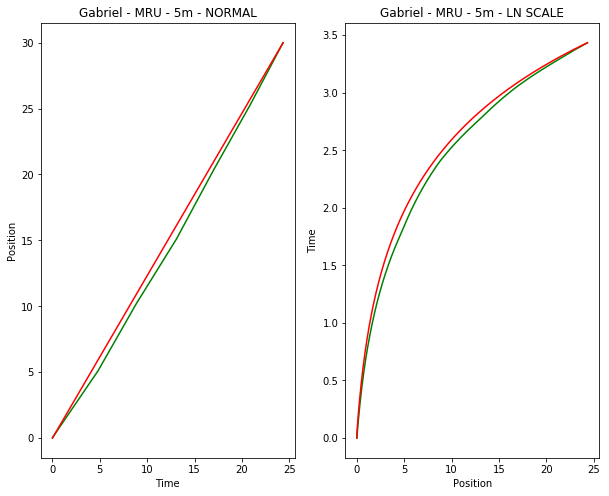

In [51]:
#plotar graficos do MRU
aux = len(pessoas)
ideal_x = [0, 0]
ideal_y = [0, 30]
for i in range(0, aux):
    #prints 10m MRU
    #prints normal MRU
    plt.figure(2*aux*i, figsize=(10, 8))
    d_plt = plt.subplot(1, 2, 1)
    d_plt.plot(xRange[i], plt_mru_10m_euler[i], 'g')
    d_plt.plot([0, xRange[i][len(xRange[i]) - 1]], [0, 30], 'r')
    d_plt.set(ylabel = 'Position', xlabel = 'Time', title = str(auxiliary[i]) + " - MRU - 10m - NORMAL")
    #prints MRU with ln scale
    ln_plt = plt.subplot (1, 2, 2)
    ln_plt.plot(xRange[i], plt_mru_10m_euler_ln[i], 'g')
    ln_plt.plot(xRange[i], plt_mru_10m_ideal_ln[i], 'r')
    ln_plt.set(ylabel = 'Time', xlabel = 'Position', title = str(auxiliary[i]) + " - MRU - 10m - LN SCALE")
    #prints 5m MRU
    #prints normal MRU
    plt.figure(2*aux*i + 1, figsize=(10, 8))
    d5_plt = plt.subplot(1, 2, 1)
    d5_plt.plot(xRange[i+3], plt_mru_5m_euler[i], 'g')
    d5_plt.plot([0, xRange[i+3][len(xRange[i+3]) - 1]], [0, 30], 'r')
    d5_plt.set(ylabel = 'Position', xlabel = 'Time', title = str(auxiliary[i]) + " - MRU - 5m - NORMAL")
    #prints MRU with ln scale
    ln5_plt = plt.subplot (1, 2, 2)
    ln5_plt.plot(xRange[i + 3], plt_mru_5m_euler_ln[i], 'g')
    ln5_plt.plot(xRange[i + 3], plt_mru_5m_ideal_ln[i], 'r')
    ln5_plt.set(ylabel = 'Time', xlabel = 'Position', title = str(auxiliary[i]) + " - MRU - 5m - LN SCALE")
    

In [56]:
#Tratar dados para o MUV
df_muv_ppl_10m = {}
df_muv_ppl_5m = {}

def getAvAcc(so, s, vo, dt):
    return 2*(s - so - vo*dt)/(dt*dt)

def getV(vo, a, dt):
    return vo + a*dt

for p in pessoas:
    #Average for 10m
    aux = df_muv_10m[df_muv_10m.Pessoa == p]
    valSum10 = aux["10m"].sum()/3
    valSum20 = aux["20m"].sum()/3
    valSum30 = aux["30m"].sum()/3
    am10 = getAvAcc(0, 10, 0, valSum10)
    v10 = getV(0, am10, valSum10)
    am20 = getAvAcc(10, 20, v10, valSum20 - valSum10)
    v20 = getV(v10, am20, valSum20 - valSum10)
    am30 = getAvAcc(20, 30, v20, valSum30 - valSum20)
    v30 = getV(v20, am30, valSum30 - valSum20)
    df_muv_ppl_10m[p] = {'10m' : valSum10, '20m' : valSum20,
                  '30m' : valSum30, 'AM_0-10' : am10, 'AM_10-20' : am20,
                  'AM_20-30' : am30, 'AM' : getAvAcc(0, 30, 0, valSum30)}
    
    #Average for 5m
    #average for MUV
    aux = df_muv_5m[df_muv_5m.Pessoa == p]
    valSum5  = aux["5m"].sum()/3
    valSum10 = aux["10m"].sum()/3
    valSum15 = aux["15m"].sum()/3
    valSum20 = aux["20m"].sum()/3
    valSum25 = aux["25m"].sum()/3
    valSum30 = aux["30m"].sum()/3
    am5 = getAvAcc(0, 5, 0, valSum5)
    v5 = getV(0, am5, valSum5)
    am10 = getAvAcc(5, 10, v5, valSum10 - valSum5)
    v10 = getV(v5, am10, valSum10 - valSum5)
    am15 = getAvAcc(10, 15, v10, valSum15 - valSum10)
    v15 = getV(v10, am15, valSum15 - valSum10)
    am20 = getAvAcc(15, 20, v15, valSum20 - valSum15)
    v20 = getV(v15, am20, valSum20 - valSum15)
    am25 = getAvAcc(20, 25, v20, valSum25 - valSum20)
    v25 = getV(v20, am25, valSum25 - valSum20)
    am30 = getAvAcc(25, 30, v25, valSum30 - valSum25)
    v30 = getV(v25, am30, valSum30 - valSum25)
    df_muv_ppl_5m[p] = {'5m' : valSum5, '10m' : valSum10, '15m' : valSum15, '20m' : valSum20, '25m' : valSum25,
                  '30m' : valSum30, 'AM_0-5' : am5, 'AM_5-10' : am10,
                  'AM_10-15' : am15, 'AM_15-20' : am20,
                  'AM_20-25' : am25, 'AM_25-30' : am30, 'AM' : getAvAcc(0, 30, 0, valSum30)}

print(df_muv_ppl_10m)


{'Matheus': {'10m': 9.313333333333334, '20m': 13.511666666666665, '30m': 16.945, 'AM_0-10': 0.2305789735546413, 'AM_10-20': 0.11168181248046243, 'AM_20-30': 0.17259322880811542, 'AM': 0.20896237902275433}, 'Kazu': {'10m': 6.496666666666666, '20m': 10.316666666666668, '30m': 13.515, 'AM_0-10': 0.4738586653349484, 'AM_10-20': -0.24120458045669982, 'AM_20-30': 0.6062708622433329, 'AM': 0.328487728724979}, 'Gabriel': {'10m': 7.591666666666666, '20m': 11.741666666666667, '30m': 15.174999999999999, 'AM_0-10': 0.34702098151510813, 'AM_10-20': -0.10835135604112217, 'AM_20-30': 0.4239680789078238, 'AM': 0.260551663866641}}


In [60]:
#params for euler/analytical
xRange = {}
params_muv = [0, 0, 0]
plt_muv_10m_euler = []
plt_muv_10m_ideal = []
plt_muv_10m_euler_ln = []
plt_muv_10m_ideal_ln = []
plt_muv_5m_euler = []
plt_muv_5m_ideal = []
plt_muv_5m_euler_ln = []
plt_muv_5m_ideal_ln = []
auxiliary = {0: "Matheus", 1:"Kazu", 2:"Gabriel"}

for i in range(len(pessoas)):
    #calculates the 10m  data
    plt_muv_10m_euler.append([0])
    plt_muv_10m_euler_ln.append([0])
    plt_muv_10m_ideal.append([0])
    j = 0
    step = 0.03
    max = df_muv_ppl_10m[auxiliary[i]]["30m"]
    am = df_muv_ppl_10m[auxiliary[i]]["AM"]
    xRange[i] = [0]
    index = 0
    while(j < max):
        xRange[i].append(j)
        aux = plt_muv_10m_euler[i][index]
        if (aux < 10):
            params_muv[0] = df_muv_ppl_10m[auxiliary[i]]['AM_0-10']
        elif (aux < 20):
            params_muv[0] = df_muv_ppl_10m[auxiliary[i]]['AM_10-20']
        else:
            params_muv[0] = df_muv_ppl_10m[auxiliary[i]]['AM_20-30']
        plt_muv_10m_euler[i].append(nextXeuler(aux, j, params_muv, step))
        plt_muv_10m_euler_ln[i].append(math.log(1 + plt_muv_10m_euler[i][index]))
        plt_muv_10m_ideal[i].append(nextXeuler(plt_muv_10m_ideal[i][index], j, [am, 0, 0], step))
        j += step
        index += 1
    plt_muv_10m_ideal_ln.append(plt_muv_10m_ideal[i].copy())
    for j in range(len(plt_muv_10m_ideal_ln[i])):
        plt_muv_10m_ideal_ln[i][j] = math.log(1 + plt_muv_10m_ideal_ln[i][j])

#print(plt_muv_10m_euler[0])

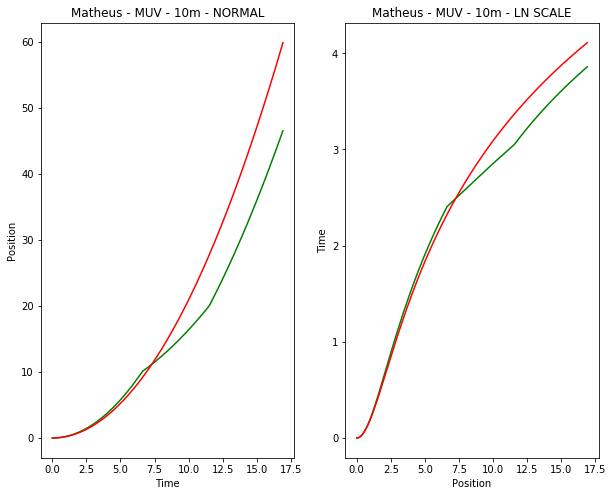

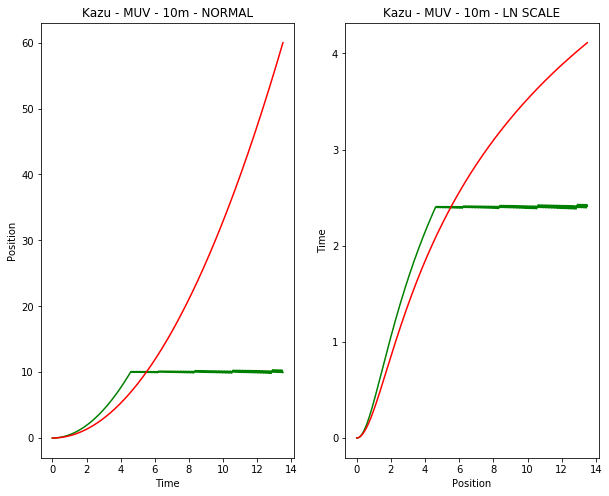

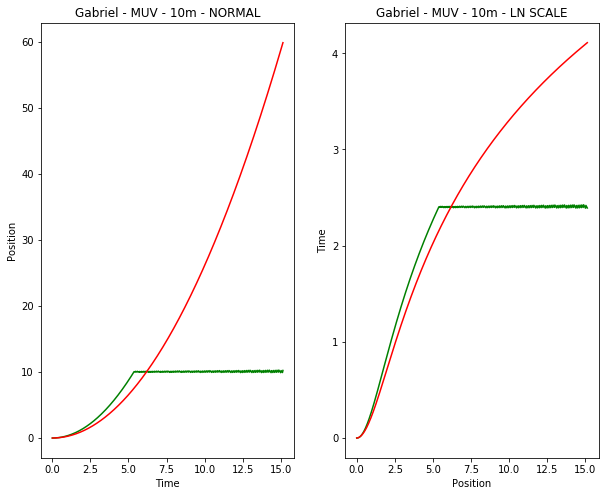

In [54]:
#plotar graficos do MUV
aux = len(pessoas)
ideal_x = [0, 0]
ideal_y = [0, 30]
for i in range(0, aux):
    #prints 10m MUV
    #prints normal MUV
    plt.figure(2*aux*i, figsize=(10, 8))
    d_plt = plt.subplot(1, 2, 1)
    d_plt.plot(xRange[i], plt_muv_10m_euler[i], 'g')
    d_plt.plot(xRange[i], plt_muv_10m_ideal[i], 'r')
    d_plt.set(ylabel = 'Position', xlabel = 'Time', title = str(auxiliary[i]) + " - MUV - 10m - NORMAL")
    #prints MUV with ln scale
    ln_plt = plt.subplot (1, 2, 2)
    ln_plt.plot(xRange[i], plt_muv_10m_euler_ln[i], 'g')
    ln_plt.plot(xRange[i], plt_muv_10m_ideal_ln[i], 'r')
    ln_plt.set(ylabel = 'Time', xlabel = 'Position', title = str(auxiliary[i]) + " - MUV - 10m - LN SCALE")